[*********************100%***********************]  1 of 1 completed


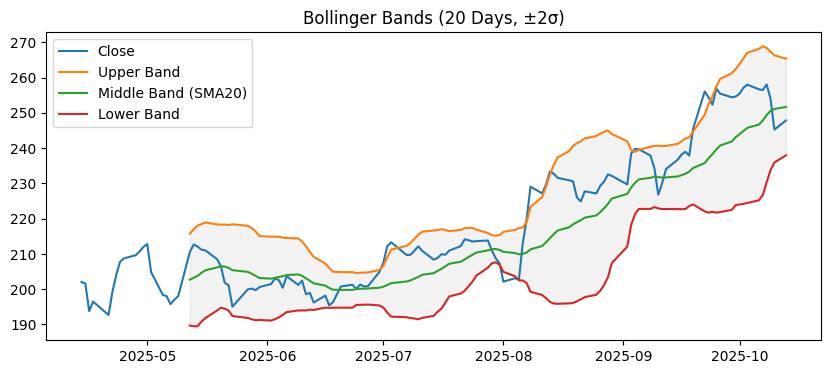

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 다운로드
df = yf.download("AAPL", period="6mo", auto_adjust=True)

# 볼린저 밴드 계산
def bollinger_bands(series, n=20, k=2.0):
    mid = series.rolling(window=n).mean()
    std = series.rolling(window=n).std()
    upper = mid + k * std
    lower = mid - k * std
    return upper, mid, lower

df["BBU"], df["BBM"], df["BBL"] = bollinger_bands(df["Close"], 20, 2)

# 시각화
plt.figure(figsize=(10,4))
plt.plot(df.index, df["Close"], label="Close")
plt.plot(df.index, df["BBU"], label="Upper Band")
plt.plot(df.index, df["BBM"], label="Middle Band (SMA20)")
plt.plot(df.index, df["BBL"], label="Lower Band")
plt.fill_between(df.index, df["BBL"], df["BBU"], color="gray", alpha=0.1)  # 밴드 영역
plt.legend(); plt.title("Bollinger Bands (20 Days, ±2σ)")
plt.show()


[*********************100%***********************]  1 of 1 completed


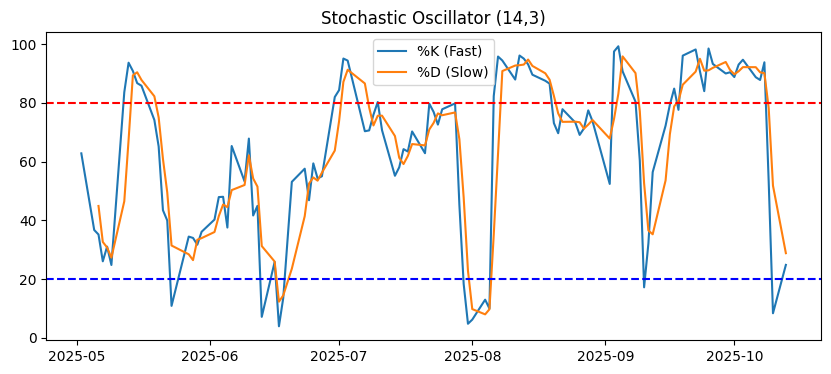

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 다운로드
df = yf.download("AAPL", period="6mo", auto_adjust=True)

# 스토캐스틱 함수
def stochastic_oscillator(df, n=14, d=3):
    low_min = df["Low"].rolling(window=n).min()
    high_max = df["High"].rolling(window=n).max()
    k = (df["Close"] - low_min) / (high_max - low_min) * 100
    d_line = k.rolling(window=d).mean()
    return k, d_line

df["%K"], df["%D"] = stochastic_oscillator(df, 14, 3)

# 시각화
plt.figure(figsize=(10,4))
plt.plot(df.index, df["%K"], label="%K (Fast)")
plt.plot(df.index, df["%D"], label="%D (Slow)")
plt.axhline(80, color="red", linestyle="--")
plt.axhline(20, color="blue", linestyle="--")
plt.legend(); plt.title("Stochastic Oscillator (14,3)")
plt.show()


In [4]:
df = yf.download("AAPL", period="6mo", auto_adjust=True)
df["Close"].shift(-1)

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2025-03-24,223.203659
2025-03-25,220.989075
2025-03-26,223.303421
2025-03-27,217.367935
2025-03-28,221.587616
...,...
2025-09-16,238.990005
2025-09-17,237.880005
2025-09-18,245.500000


[*********************100%***********************]  1 of 1 completed


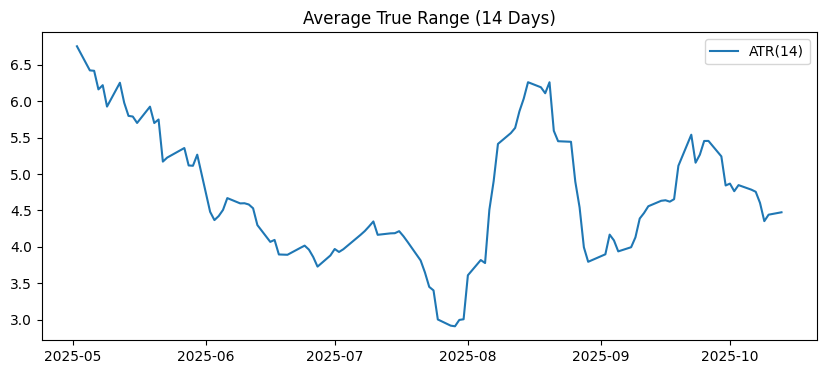

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 다운로드
df = yf.download("AAPL", period="6mo", auto_adjust=True)

# ATR 함수
def ATR(df, n=14):
    prev_close = df["Close"].shift(1)
    tr = pd.concat([
        df["High"] - df["Low"],
        (df["High"] - prev_close).abs(),
        (df["Low"] - prev_close).abs()
    ], axis=1).max(axis=1)
    atr = tr.rolling(window=n).mean()
    return atr

df["ATR14"] = ATR(df, 14)

# 시각화
plt.figure(figsize=(10,4))
plt.plot(df.index, df["ATR14"], label="ATR(14)")
plt.legend(); plt.title("Average True Range (14 Days)")
plt.show()


In [ ]:
df["ATR14"] = ATR(df, 14)
df["ATR14"]

Date
2025-03-24         NaN
2025-03-25         NaN
2025-03-26         NaN
2025-03-27         NaN
2025-03-28         NaN
                ...   
2025-09-16    4.639285
2025-09-17    4.620001
2025-09-18    4.654286
2025-09-19    5.112142
2025-09-22    5.538572
Name: ATR14, Length: 126, dtype: float64

In [30]:
df["ATR14"] = df["ATR14"].fillna(0)

In [32]:
df

Price,Close,High,Low,Open,Volume,ATR14,ProfitLine,LossLine
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2025-03-24,220.191025,220.939193,218.046281,220.460370,44299500,0.000000,NaN,NaN
2025-03-25,223.203659,223.552811,219.542622,220.230940,34493600,0.000000,NaN,NaN
2025-03-26,220.989075,224.470558,219.931665,222.964236,34466100,0.000000,NaN,NaN
2025-03-27,223.303421,224.440637,220.021446,220.849421,37094800,0.000000,NaN,NaN
2025-03-28,217.367935,223.263508,217.148471,221.128734,39818600,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-09-16,238.149994,241.220001,236.320007,237.179993,63421100,4.639285,NaN,NaN
2025-09-17,238.990005,240.100006,237.729996,238.970001,46508000,4.620001,NaN,NaN


In [35]:
df.isna().sum()

Price       Ticker
Close       AAPL        0
High        AAPL        0
Low         AAPL        0
Open        AAPL        0
Volume      AAPL        0
ATR14                   0
ProfitLine            126
LossLine              126
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2025-03-24 to 2025-09-22
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   126 non-null    float64
 1   (High, AAPL)    126 non-null    float64
 2   (Low, AAPL)     126 non-null    float64
 3   (Open, AAPL)    126 non-null    float64
 4   (Volume, AAPL)  126 non-null    int64  
 5   (ATR14, )       126 non-null    float64
 6   (ProfitLine, )  0 non-null      float64
 7   (LossLine, )    0 non-null      float64
dtypes: float64(7), int64(1)
memory usage: 8.9 KB


In [41]:
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] for col in df.columns]

In [42]:
df

,Close,High,Low,Open,Volume,ATR14,ProfitLine,LossLine
Date,,,,,,,,
2025-03-24,220.191025,220.939193,218.046281,220.460370,44299500,0.000000,NaN,NaN
2025-03-25,223.203659,223.552811,219.542622,220.230940,34493600,0.000000,NaN,NaN
2025-03-26,220.989075,224.470558,219.931665,222.964236,34466100,0.000000,NaN,NaN
2025-03-27,223.303421,224.440637,220.021446,220.849421,37094800,0.000000,NaN,NaN
2025-03-28,217.367935,223.263508,217.148471,221.128734,39818600,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-09-16,238.149994,241.220001,236.320007,237.179993,63421100,4.639285,NaN,NaN
2025-09-17,238.990005,240.100006,237.729996,238.970001,46508000,4.620001,NaN,NaN
2025-09-18,237.880005,241.199997,236.649994,239.970001,44249600,4.654286,NaN,NaN


In [45]:
df["ProfitLine"] = df['Close'] + 2*df["ATR14"]
df["LossLine"] = df['Close'] - 2*df["ATR14"]

In [46]:
df

,Close,High,Low,Open,Volume,ATR14,ProfitLine,LossLine
Date,,,,,,,,
2025-03-24,220.191025,220.939193,218.046281,220.460370,44299500,0.000000,220.191025,220.191025
2025-03-25,223.203659,223.552811,219.542622,220.230940,34493600,0.000000,223.203659,223.203659
2025-03-26,220.989075,224.470558,219.931665,222.964236,34466100,0.000000,220.989075,220.989075
2025-03-27,223.303421,224.440637,220.021446,220.849421,37094800,0.000000,223.303421,223.303421
2025-03-28,217.367935,223.263508,217.148471,221.128734,39818600,0.000000,217.367935,217.367935
...,...,...,...,...,...,...,...,...
2025-09-16,238.149994,241.220001,236.320007,237.179993,63421100,4.639285,247.428565,228.871423
2025-09-17,238.990005,240.100006,237.729996,238.970001,46508000,4.620001,248.230007,229.750004
2025-09-18,237.880005,241.199997,236.649994,239.970001,44249600,4.654286,247.188577,228.571433


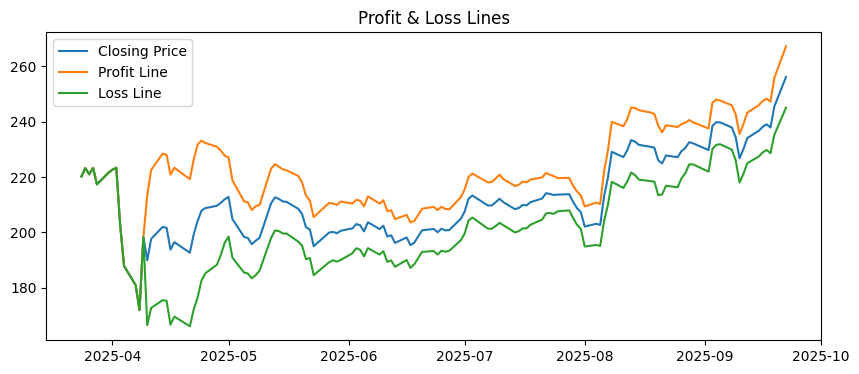

In [47]:
# 시각화
plt.figure(figsize=(10,4))
plt.plot(df.index, df["Close"], label="Closing Price")
plt.plot(df.index, df["ProfitLine"], label="Profit Line")
plt.plot(df.index, df["LossLine"], label="Loss Line")
plt.legend(); plt.title("Profit & Loss Lines")
plt.show()

In [56]:
def RSI(series, n=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(n).mean()
    avg_loss = loss.rolling(n).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [61]:
def bollinger_bands(series, n=20, k=2.0):
    mid = series.rolling(window=n).mean()
    std = series.rolling(window=n).std()
    upper = mid + k * std
    lower = mid - k * std
    return upper, mid, lower

In [65]:
# SMA 20, 60
# EMA 20, 60 
# RSI 14
# MACD 
# BBAND
# SO
# ATR 


In [64]:
df["SMA20"] = df["Close"].rolling(window=20).mean()
df["SMA60"] = df["Close"].rolling(window=60).mean()
df["EMA20"] = df["Close"].ewm(span=20, adjust=False).mean()
df["EMA60"] = df["Close"].ewm(span=60, adjust=False).mean()
df["RSI14"] = RSI(df["Close"], 14)
df["MACD"] = df["Close"].ewm(span=12, adjust=False).mean() - df["Close"].ewm(span=26, adjust=False).mean()
df["BBU"], df["BBM"], df["BBL"] = bollinger_bands(df["Close"], 20, 2)
df["SO - %K"], df["SO - %D"] = stochastic_oscillator(df, 14, 3)
df

,Close,High,Low,Open,Volume,ATR14,ProfitLine,LossLine,SMA20,SMA60,EMA20,RSI14,EMA60,MACD,BBU,BBM,BBL,SO - %K,SO - %D
Date,,,,,,,,,,,,,,,,,,,
2025-03-24,220.191025,220.939193,218.046281,220.460370,44299500,0.000000,220.191025,220.191025,NaN,NaN,220.191025,NaN,220.191025,0.000000,NaN,NaN,NaN,NaN,NaN
2025-03-25,223.203659,223.552811,219.542622,220.230940,34493600,0.000000,223.203659,223.203659,NaN,NaN,220.477942,NaN,220.289800,0.240324,NaN,NaN,NaN,NaN,NaN
2025-03-26,220.989075,224.470558,219.931665,222.964236,34466100,0.000000,220.989075,220.989075,NaN,NaN,220.526622,NaN,220.312727,0.249211,NaN,NaN,NaN,NaN,NaN
2025-03-27,223.303421,224.440637,220.021446,220.849421,37094800,0.000000,223.303421,223.303421,NaN,NaN,220.791079,NaN,220.410782,0.437955,NaN,NaN,NaN,NaN,NaN
2025-03-28,217.367935,223.263508,217.148471,221.128734,39818600,0.000000,217.367935,217.367935,NaN,NaN,220.465065,NaN,220.311017,0.107354,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-16,238.149994,241.220001,236.320007,237.179993,63421100,4.639285,247.428565,228.871423,232.325999,219.232120,231.909656,60.913576,222.412052,3.804902,241.945433,232.325999,222.706566,79.375333,69.332754
2025-09-17,238.990005,240.100006,237.729996,238.970001,46508000,4.620001,248.230007,229.750004,232.747500,219.860760,232.583975,60.582668,222.955591,3.922926,242.771378,232.747500,222.723622,84.840597,78.811586
2025-09-18,237.880005,241.199997,236.649994,239.970001,44249600,4.654286,247.188577,228.571433,233.341000,220.490878,233.088359,56.785722,223.444916,3.882143,243.086984,233.341000,223.595017,77.618737,80.611556


In [67]:
df['Close'].shift(-1)

Date
2025-03-24    223.203659
2025-03-25    220.989075
2025-03-26    223.303421
2025-03-27    217.367935
2025-03-28    221.587616
                 ...    
2025-09-16    238.990005
2025-09-17    237.880005
2025-09-18    245.500000
2025-09-19    256.079987
2025-09-22           NaN
Name: Close, Length: 126, dtype: float64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2025-03-24 to 2025-09-22
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       126 non-null    float64
 1   High        126 non-null    float64
 2   Low         126 non-null    float64
 3   Open        126 non-null    float64
 4   Volume      126 non-null    int64  
 5   ATR14       126 non-null    float64
 6   ProfitLine  126 non-null    float64
 7   LossLine    126 non-null    float64
 8   SMA20       107 non-null    float64
 9   SMA60       67 non-null     float64
 10  EMA20       126 non-null    float64
 11  RSI14       112 non-null    float64
 12  EMA60       126 non-null    float64
 13  MACD        126 non-null    float64
 14  BBU         107 non-null    float64
 15  BBM         107 non-null    float64
 16  BBL         107 non-null    float64
 17  SO - %K     113 non-null    float64
 18  SO - %D     111 non-null    float64
dtypes: float64